In [69]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import time

x = sp.symbols('x')

def lagrange(x_data, y_data):
  P = 0
  n = len(x_data)
  for i in range(n):
    T = 1
    for j in range(n):
      if i != j:
        T *= (x-x_data[j])/(x_data[i]-x_data[j])
    P+=T * y_data[i]
  return sp.expand(P)

def JacobiMatrices(A,b, x0, tol):
  D = np.diag(np.diag(A))
  U = D - np.triu(A)
  L = D - np.tril(A)

  Tj=np.dot(np.linalg.inv(D), L+U)

  Cj=np.dot(np.linalg.inv(D), b)

  eig,eiv =np.linalg.eig(Tj)
  radio=max(abs(eig))
  print(f"Radio: {radio}")
  if radio<1:
    error=1
    while error > tol:
      x_new = np.dot(Tj,x0) + Cj
      error = max(abs(x_new - x0))
      x0 = x_new
    return x_new
  else:
    print("Lo siento, el sistema no converge")
    
def GaussMatrices(A, b, x0, tolerancia = 1e-6):
  # Primero construir el sistema iterativo
  n = len(b)
  D = np.diag(np.diag(A))
  U = D - np.triu(A)
  L = D - np.tril(A)
  Tg = np.dot(np.linalg.inv(D-L), U)
  Cg = np.dot(np.linalg.inv(D - L), b)
  eig, eiv = np.linalg.eig(Tg) # Retorna 2 parametros: 1) Valores propios, 2) Vectores propios
  radio = max(abs(eig))
  print("Radio Espectral", radio)

  if (radio < 1):
    print("El sistema converge")
    start = time.time()
    error = 1
    while (error > tolerancia):
      x_new = np.dot(Tg, x0) + Cg
      print(x_new)
      error = max(abs(x_new - x0))
      x0 = x_new
    end = time.time()
    print("Tiempo de ejecucion: ", end - start)
    return x_new
  else:
    print("El sistema no converge")

# Punto 1

## Punto A

El punto A está en la parte de atrás de la hoja

## Punto B y D

In [70]:
A = np.array([[1,-1/4, -1/4, 0],[-1/4, 1, 0, -1/4],[-1/4,0,1,-1/4], [0,-1/4,-1/4, 1]], float)
b = np.array([175/4, 125/4, 75/4, 25/4], float)
x0 = np.zeros_like(b)

JacobiMatrices(A, b, x0, 1e-8)

Radio: 0.49999999999999983


array([68.74999999, 56.24999999, 43.74999999, 31.24999999])

## Parte C y D

In [73]:
A = np.array([[1,-1/4, -1/4, 0],[-1/4, 1, 0, -1/4],[-1/4,0,1,-1/4], [0,-1/4,-1/4, 1]], float)
b = np.array([175/4, 125/4, 75/4, 25/4], float)
x0 = np.zeros_like(b)

GaussSeidelMatrices(A, b, x0, 1e-8)

Radio: 0.25


array([68.75, 56.25, 43.75, 31.25])

# Punto 2

## Parte A

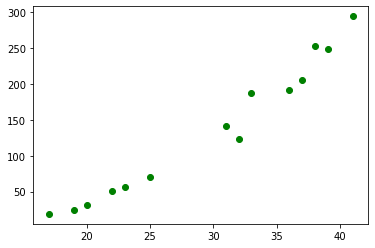

In [16]:
x_data = np.array([17, 19, 20, 22, 23, 25, 31, 32, 33, 36, 37, 38, 39, 41])
y_data = np.array([19, 25, 32,51, 57, 71, 141, 123, 187, 192, 205,252, 248, 294])

ux = np.linspace(min(x_data) -10, max(x_data) + 10, 100)
plt.plot(x_data, y_data, 'og', label = 'Datos observados')

## Parte B y E

Polinomio Interpolador:
-2086829*x**13/643624869888000 + 1396300817*x**12/1126343522304000 - 312156523*x**11/1436662656000 + 1859387225693*x**10/80453108736000 - 25503732347371*x**9/15324401664000 + 20511820169999*x**8/239443776000 - 521697979689426613*x**7/160906217472000 + 51444969554284810313*x**6/563171761152000 - 176140161643225219787*x**5/91946409984000 + 4751723691180209259641*x**4/160906217472000 - 2492041253601276403541*x**3/7662200832000 + 773656363762385732099*x**2/319258368000 - 815538165372905308127*x/74493619200 + 35512654090765/1568


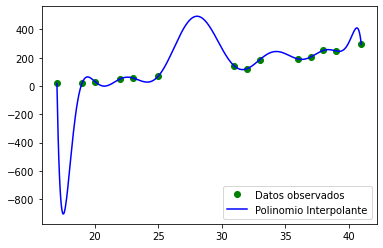

In [33]:
P = lagrange(x_data, y_data)
print("Polinomio Interpolador:")
print(P)

p = sp.lambdify(x, P, 'numpy')


ux1 = np.linspace(min(x_data), max(x_data), 500)
ux2 = p(ux1)


plt.plot(x_data, y_data, 'og', label = 'Datos observados')
plt.plot(ux1,ux2, 'b', label = 'Polinomio Interpolante')
plt.legend()

## Parte C

In [40]:
Polinomio_en_datos = P.evalf(subs={x:28})
print(Polinomio_en_datos)

Polinomio_en_datos = P.evalf(subs={x:34})
print(Polinomio_en_datos)

493.552344292980
241.075684779858


### Conclusión C

Al evaluar el polinomio en el valor de 28, su resultado es 493.55, si analizamos la figura, podemos evidenciar que los datos entre 25 y 30 están cerca de 400, y cuando está en valores como 27 y 28 sobrepasa por mucho 400, por lo que se ve que está aproximadamente en 493.552.

En el otro caso, cuando evaluamos el polinomio en 34, su resultado es 242, observando la figura, los valores entre 30 y 35, están un poco por encimae de 200, si observamos los valores antes de 35, se ve que es una cuarta parte entre 200 y 400, osea casi en 250, lo cuál es muy cercano a 241,076.

Por lo tanto se puede concluir que estas estimaciones son válidas para estos valores.

## Parte D

Como pudimos visualizar en la gráfica, y confirmando con la evaluación de otros datos como los diámetros 28 y 34. Se puede concluir que utilizar polinomios de grado 13 si es conveniente, ya que se ajusta de manera adecuada a todos los datos registrados. Por lo que, si se requieren hacer predicciones futuras, este método es adecuado para aproximar el valor en el futuro y que tendencia tendrá: si bajará o subirá.